In [3]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix

In [4]:
data = pd.read_csv("/Users/tusshar/LogisticClassifier/data/Healthcare_Dataset_Preprocessed.csv")

In [5]:
numerical_col = ['Age','BMI','Blood_Pressure','Cholesterol','Glucose_Level','Heart_Rate','Sleep_Hours','Exercise_Hours','Water_Intake','Stress_Level']
ordinal_col = ['Smoking','Alcohol','Diet','MentalHealth','PhysicalActivity','MedicalHistory','Allergies']
categorical_col = ['Diet_Type_Vegan','Diet_Type_Vegetarian','Blood_Group_AB','Blood_Group_B','Blood_Group_O']
target_col = 'Target'


In [6]:
data['Age'] = data['Age'].clip(lower=0)
data['Blood_Presuure'] = data['Blood_Pressure'].clip(50,200)
data['BMI'] = data['BMI'].clip(15,50)
data['Heart_Rate'] = data['Heart_Rate'].clip(30,200)
data['Sleep_Hours'] = data['Sleep_Hours'].clip(0, 12)
data['Exercise_Hours'] = data['Exercise_Hours'].clip(0, 10)
data['Water_Intake'] = data['Water_Intake'].clip(0, 10)
data['Stress_Level'] = data['Stress_Level'].clip(0, 10)

In [7]:
for col in numerical_col:
    data[col] = data[col].fillna(data[col].median())
for col in ordinal_col:
    data[col] = data[col].fillna(data[col].mode()[0])
for col in categorical_col:
    data[col] = data[col].fillna(data[col].mode()[0])
    

In [8]:
scaler = StandardScaler()
data[numerical_col] = scaler.fit_transform(data[numerical_col])

In [9]:
X = data.drop(columns=[target_col])
y = data[target_col]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)

In [14]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.81
Precision: 0.82, Recall: 0.83, F1-Score: 0.82
Confusion Matrix:
 [[728 186]
 [171 825]]


In [15]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

In [16]:
import matplotlib.pyplot as plt

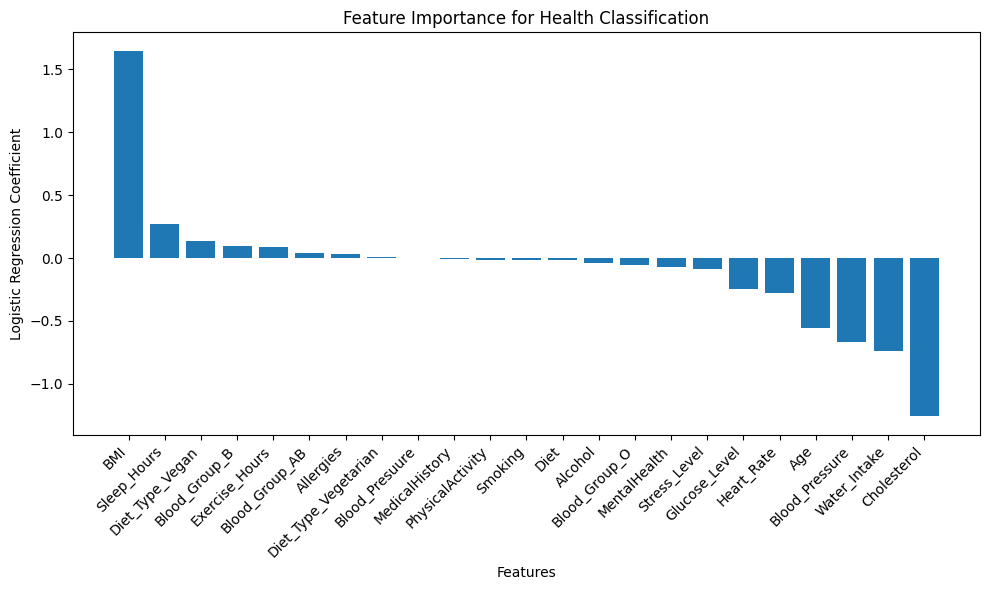

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Logistic Regression Coefficient')
plt.title('Feature Importance for Health Classification')
plt.tight_layout()
